# GIS (Geographic Information System or Science)

* 지리공간데이터를 생성/편집/저장/분석/시각화하기 위한 모든 Science

#### Geographic
* 지표상에 있는 모든 지리(地理)적 사상(Feature)

#### Information
* 디지털화된 데이터

#### System / Science
* 지리공간데이터를 처리하기 위한 모든 기법/방법

# GeoPandas

* `python`으로 지리공간데이터(Geospatial Data)를 다루기 위한 오픈소스 라이브러리
* `pandas`를 확장한 라이브러리
* `python`에는 다양한 지리공간데이터를 처리할 수 있는 라이브러리들이 존재 (ex:  `GDAL/OGR`, `shapely`, `fiona`, `descrates`)
    * `GeoPandas`는 내부적으로 `shapely`, `fiona`, `descrates`, `matplotlib`에 의존

In [1]:
# GeoPandas설치하기
# !pip3 install geopandas

In [2]:
# _01 라이브러리 추가하기
import geopandas as gpd

# Reading data
- `GeoPandas`는 vector 타입의 대부분 포맷 들을 읽을 수 있습니다.
    - `shp`, `geojson`, `GML`, `KML`...

In [3]:
# _02 서울시 행정동 .shp파일
file_path = './data/seoul_h_dong.shp'

# _03 지도 파일을 불러와 GeoDataFrame 생성하기
gdf = gpd.read_file(file_path)

In [4]:
# _04 데이터 확인하기
gdf.head()

,SGG_NM,DONG_NM,SGG_CODE,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER,geometry
0,종로구,사직동,11110,4414,2.14,9717,4467,5250,1708,"POLYGON ((197958.449 552900.684, 197971.141 55..."
1,종로구,삼청동,11110,1414,2.06,3097,1459,1638,634,"POLYGON ((198471.244 555055.390, 198531.565 55..."
2,종로구,부암동,11110,4325,2.39,10726,5160,5566,1748,"POLYGON ((197867.379 555221.862, 197667.351 55..."
3,종로구,평창동,11110,7510,2.53,19163,9032,10131,3037,"POLYGON ((197799.834 559086.753, 197924.336 55..."
4,종로구,무악동,11110,3024,2.75,8375,3921,4454,1279,"POLYGON ((196526.290 553472.425, 196714.981 55..."


In [5]:
# _05 Dataframe 개요정보 확인하기
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SGG_NM      424 non-null    object  
 1   DONG_NM     424 non-null    object  
 2   SGG_CODE    424 non-null    object  
 3   SEDAE       424 non-null    int64   
 4   SEDAE_INGU  424 non-null    float64 
 5   TOTAL_POP   424 non-null    int64   
 6   MALE_POP    424 non-null    int64   
 7   FEMALE_POP  424 non-null    int64   
 8   65_OVER     424 non-null    int64   
 9   geometry    424 non-null    geometry
dtypes: float64(1), geometry(1), int64(5), object(3)
memory usage: 33.2+ KB


In [6]:
# _07 Dataframe 통계정보 확인하기
gdf.describe()

,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,9953.023585,2.338137,23878.724057,11693.058962,12185.665094,3219.636792
std,3889.031075,0.348433,9431.363644,4594.843032,4866.509822,1279.225377
min,365.000000,1.350000,905.000000,450.000000,455.000000,114.000000
25%,7358.250000,2.127500,17607.250000,8669.750000,9028.500000,2340.750000
50%,9723.000000,2.330000,23178.000000,11361.500000,11732.500000,3107.000000
75%,12395.000000,2.542500,29671.000000,14559.000000,14998.000000,3965.500000
max,25214.000000,3.420000,55569.000000,26975.000000,29079.000000,7244.000000


In [7]:
# _08 평균값 가져오기
gdf['TOTAL_POP'].mean()

23878.724056603773

In [8]:
# _10 GeoPandas 데이터구조 확인하기
# GeoPandas Data Structure - GeoDataFrame / Series / GeoSeries
print(type(gdf))
print(type(gdf['DONG_NM']))
print(type(gdf['geometry']))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'pandas.core.series.Series'>
<class 'geopandas.geoseries.GeoSeries'>


# GeoSeries 알아보기
* Pandas의 Series + Geometry
## GeoSeries 속성(Attributes)
* geom_type
    * Points / Multi-Points
    * Lines / Multi-Lines
    * Polygons / Multi-Polygons
* area
* bounds
* total_bounds

In [9]:
# _11 geometry type 확인하기
gdf['geometry'].geom_type[:10]

0    Polygon
1    Polygon
2    Polygon
3    Polygon
4    Polygon
5    Polygon
6    Polygon
7    Polygon
8    Polygon
9    Polygon
dtype: object

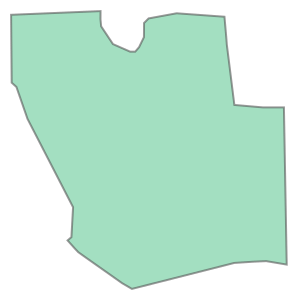

In [10]:
# _12 Polygon(Geometry) 확인하기 
gdf['geometry'][0]

<AxesSubplot:>

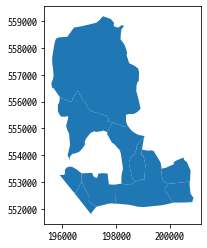

In [11]:
gdf['geometry'][0:10].plot()

In [12]:
# _13 GeoSeries 면적 계산하기
gdf['geometry'].area[:5]

0    1.165780e+06
1    1.361445e+06
2    2.202073e+06
3    9.017316e+06
4    4.675752e+05
dtype: float64

In [13]:
# 사직동 면적 1.23 km2 
area = gdf['geometry'].area[0]
print(area)
print(type(area))

1165779.6434216234
<class 'numpy.float64'>


In [14]:
# _15 좌표체계 확인하기
# 실제 데이터는 중부원점(GRS80) / EPSG:5186 입니다.
gdf.crs

In [15]:
# _16 GeoSeries bbox가져오기
gdf['geometry'].bounds[:5]

,minx,miny,maxx,maxy
0,196714.981359,552073.313951,197971.140726,553339.420765
1,197667.350764,552886.757958,199070.532651,555221.862405
2,195827.437507,553807.003187,197867.379010,556387.087748
3,195583.723664,555055.371189,198917.474288,559186.620547
4,195897.493788,552602.691416,196717.560194,553572.333845


In [16]:
# _17 지도 전체 bbox가져오기
gdf['geometry'].total_bounds

array([179171.58071505, 536627.30404374, 216220.74149712, 566821.94693283])

## GeoSeries Method
* Basic Method
    * centroid
    * distance()
    * representative_point()
    * to_crs()
    * plot()
* Relationship Test
    * geom_almost_equals()
    * contains()
    * intersects()

In [17]:
# _18 폴리곤 중심점 
gdf['geometry'].centroid[:5]

0    POINT (197362.562 552729.621)
1    POINT (198331.945 554272.676)
2    POINT (196693.345 555237.149)
3    POINT (197287.223 557153.268)
4    POINT (196377.356 553133.185)
dtype: geometry

In [18]:
# _19 폴리곤 내 Point
# 폴리곤 안에 있음 == True, but 중심점임을 확신할 수 없음
gdf['geometry'].representative_point()[:5]

0    POINT (197428.258 552646.935)
1    POINT (198437.810 554051.788)
2    POINT (196966.953 555083.693)
3    POINT (197247.540 557169.933)
4    POINT (196364.627 553114.951)
dtype: geometry

In [19]:
# _20 두 포인트 사이 거리 계산하기
start_point = gdf['geometry'].centroid[0]
end_point = gdf['geometry'].centroid[1]

start_point.distance(end_point)

1822.2849209513395

<AxesSubplot:>

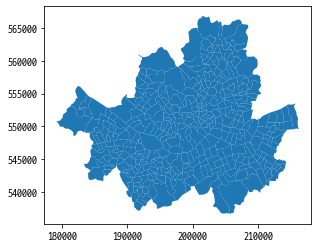

In [20]:
# _21 지도 그리기
%matplotlib inline
gdf.plot()

In [21]:
# _22 현재 위치정보(좌표)가 저장된 GeoSeries명 확인하기 - gemetry name확인
gdf.geometry.name

'geometry'

In [22]:
# _23 컬럼명 변경하기
gdf = gdf.rename(columns={'geometry': 'geom'})
gdf.geometry.name

AttributeError: No geometry data set yet (expected in column 'geometry'.)

In [23]:
# _25 GeoDataFrame에 geometry 등록하기
gdf = gdf.set_geometry('geom')
gdf.geometry.name

'geom'

In [24]:
# _26 GeoDataFrame의 새로운 컬럼에 폴리곤 중심점 값을 할당하기
gdf['centoroid'] = gdf.centroid
gdf.head()

,SGG_NM,DONG_NM,SGG_CODE,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER,geom,centoroid
0,종로구,사직동,11110,4414,2.14,9717,4467,5250,1708,"POLYGON ((197958.449 552900.684, 197971.141 55...",POINT (197362.562 552729.621)
1,종로구,삼청동,11110,1414,2.06,3097,1459,1638,634,"POLYGON ((198471.244 555055.390, 198531.565 55...",POINT (198331.945 554272.676)
2,종로구,부암동,11110,4325,2.39,10726,5160,5566,1748,"POLYGON ((197867.379 555221.862, 197667.351 55...",POINT (196693.345 555237.149)
3,종로구,평창동,11110,7510,2.53,19163,9032,10131,3037,"POLYGON ((197799.834 559086.753, 197924.336 55...",POINT (197287.223 557153.268)
4,종로구,무악동,11110,3024,2.75,8375,3921,4454,1279,"POLYGON ((196526.290 553472.425, 196714.981 55...",POINT (196377.356 553133.185)


In [25]:
# _27 해당 Dataframe의 geometry컬럼 변경하기
gdf = gdf.set_geometry('centoroid')
gdf.geometry.name

'centoroid'

<AxesSubplot:>

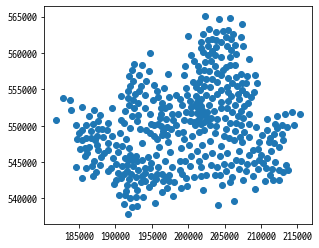

In [26]:
# _28 plot
gdf.plot()

In [27]:
print(type(gdf['geom']))
print(type(gdf['centoroid']))

<class 'geopandas.geoseries.GeoSeries'>
<class 'geopandas.geoseries.GeoSeries'>


## Map Projection
* https://www.osgeo.kr/17?fbclid=IwAR0pm8EkkCvsIKAXumPfkv5dmfgcF71WrmONkIpHBhWqbVxnF1_l0t-BntU

In [28]:
# _01 GeoDataFrame Projection확인하기
gdf.crs

In [29]:
# _02 좌표체계 입력하기 1
gdf.crs = {'init': 'epsg:5186'}
print(gdf.crs)
gdf.head()

+init=epsg:5186 +type=crs


C:\Users\user\anaconda3\envs\ox\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,SGG_NM,DONG_NM,SGG_CODE,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER,geom,centoroid
0,종로구,사직동,11110,4414,2.14,9717,4467,5250,1708,"POLYGON ((197958.449 552900.684, 197971.141 55...",POINT (197362.562 552729.621)
1,종로구,삼청동,11110,1414,2.06,3097,1459,1638,634,"POLYGON ((198471.244 555055.390, 198531.565 55...",POINT (198331.945 554272.676)
2,종로구,부암동,11110,4325,2.39,10726,5160,5566,1748,"POLYGON ((197867.379 555221.862, 197667.351 55...",POINT (196693.345 555237.149)
3,종로구,평창동,11110,7510,2.53,19163,9032,10131,3037,"POLYGON ((197799.834 559086.753, 197924.336 55...",POINT (197287.223 557153.268)
4,종로구,무악동,11110,3024,2.75,8375,3921,4454,1279,"POLYGON ((196526.290 553472.425, 196714.981 55...",POINT (196377.356 553133.185)


In [30]:
gdf.crs = {}
gdf.crs

In [31]:
# _02 좌표체계 입력하기 2
from fiona.crs import from_epsg
gdf.crs = from_epsg(5186)
gdf.crs

C:\Users\user\anaconda3\envs\ox\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Projected CRS: +init=epsg:5186 +no_defs +type=crs>
Name: Korea 2000 / Central Belt 2010
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore between 126°E and 128°E.
- bounds: (126.0, 33.14, 128.0, 38.33)
Coordinate Operation:
- name: Korea Central Belt 2010
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [32]:
# _02 좌표체계 입력하기 3
gdf.crs = '+proj=tmerc +lat_0=38 +lon_0=127 +k=1 +x_0=200000 +y_0=600000 +ellps=GRS80 +units=m +no_defs'
gdf.crs

<Projected CRS: +proj=tmerc +lat_0=38 +lon_0=127 +k=1 +x_0=200000  ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Transverse Mercator
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [33]:
# _03 좌표 변환하기 
# 반드시 좌표 변환이 되는 타켓 좌표체계(원본 데이터)가 존재해야 하고 변환 된 GeoDataFrame이 새롭게 생성되어야 한다.
gdf = gdf.to_crs(epsg=4326)
print(gdf.crs)
gdf.head()

epsg:4326


,SGG_NM,DONG_NM,SGG_CODE,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER,geom,centoroid
0,종로구,사직동,11110,4414,2.14,9717,4467,5250,1708,"POLYGON ((197958.449 552900.684, 197971.141 55...",POINT (126.97014 37.57411)
1,종로구,삼청동,11110,1414,2.06,3097,1459,1638,634,"POLYGON ((198471.244 555055.390, 198531.565 55...",POINT (126.98111 37.58801)
2,종로구,부암동,11110,4325,2.39,10726,5160,5566,1748,"POLYGON ((197867.379 555221.862, 197667.351 55...",POINT (126.96256 37.59670)
3,종로구,평창동,11110,7510,2.53,19163,9032,10131,3037,"POLYGON ((197799.834 559086.753, 197924.336 55...",POINT (126.96927 37.61396)
4,종로구,무악동,11110,3024,2.75,8375,3921,4454,1279,"POLYGON ((196526.290 553472.425, 196714.981 55...",POINT (126.95899 37.57774)


# 실습 
## 1. 변환된 GeoDataFrame의 geometry 컬럼을 `centroid`컬럼에서 `geom`컬럼으로 변경한다.
## 2. `geom` 컬럼의 좌표 체계를 EPSG:5183 -> EPSG:4326으로 좌표변환한다.

In [34]:
gdf.geometry.name

'centoroid'

In [35]:
# geometry 컬럼 변경하기
gdf = gdf.set_geometry('geom')
print(gdf.geometry.name)
print(gdf.crs)

geom
epsg:4326


In [36]:
# GeoDataFrame의 정확한 좌표체계 정보 입력하기
print(gdf.crs)
gdf.crs = from_epsg(5186)
print(gdf.crs)

epsg:4326
+init=epsg:5186 +no_defs +type=crs


C:\Users\user\anaconda3\envs\ox\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [37]:
# 원본 파일을 복사해 새로운 변수에 할당하기
_gdf = gdf.copy()
_gdf.head()

,SGG_NM,DONG_NM,SGG_CODE,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER,geom,centoroid
0,종로구,사직동,11110,4414,2.14,9717,4467,5250,1708,"POLYGON ((197958.449 552900.684, 197971.141 55...",POINT (126.97014 37.57411)
1,종로구,삼청동,11110,1414,2.06,3097,1459,1638,634,"POLYGON ((198471.244 555055.390, 198531.565 55...",POINT (126.98111 37.58801)
2,종로구,부암동,11110,4325,2.39,10726,5160,5566,1748,"POLYGON ((197867.379 555221.862, 197667.351 55...",POINT (126.96256 37.59670)
3,종로구,평창동,11110,7510,2.53,19163,9032,10131,3037,"POLYGON ((197799.834 559086.753, 197924.336 55...",POINT (126.96927 37.61396)
4,종로구,무악동,11110,3024,2.75,8375,3921,4454,1279,"POLYGON ((196526.290 553472.425, 196714.981 55...",POINT (126.95899 37.57774)


In [38]:
# 좌표 변환된 GeoDataFrame생성 후 _gdf변수에 할당하기
_gdf = gdf.to_crs(from_epsg(4326))
_gdf.head()

C:\Users\user\anaconda3\envs\ox\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,SGG_NM,DONG_NM,SGG_CODE,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER,geom,centoroid
0,종로구,사직동,11110,4414,2.14,9717,4467,5250,1708,"POLYGON ((126.97689 37.57565, 126.97703 37.569...",POINT (126.97014 37.57411)
1,종로구,삼청동,11110,1414,2.06,3097,1459,1638,634,"POLYGON ((126.98269 37.59507, 126.98337 37.594...",POINT (126.98111 37.58801)
2,종로구,부암동,11110,4325,2.39,10726,5160,5566,1748,"POLYGON ((126.97585 37.59656, 126.97359 37.593...",POINT (126.96256 37.59670)
3,종로구,평창동,11110,7510,2.53,19163,9032,10131,3037,"POLYGON ((126.97507 37.63139, 126.97649 37.630...",POINT (126.96927 37.61396)
4,종로구,무악동,11110,3024,2.75,8375,3921,4454,1279,"POLYGON ((126.96067 37.58080, 126.96281 37.579...",POINT (126.95899 37.57774)


##  Writing data

In [44]:
# 폴더생성
# 폴더 주소 입력 시 : '\' 사용
# 예시 == !mkdir output\temp
!mkdir output

In [47]:
# _29 shp파일 저장하기 (에러발생)
_gdf.to_file('./output/seoul_h_dong', encoding='utf-8')

TypeError: Cannot interpret '<geopandas.array.GeometryDtype object at 0x000001961C96AEB0>' as a data type

In [48]:
# _30 불필요한 컬럼 제거하기
# 파일 저장 시 GeoDataFrame에는 좌표정보가 반드시 하나만 있어야 한다.
columns = ['SGG_NM', 'DONG_NM','SGG_CODE', 'SEDAE', 'SEDAE_INGU', 'TOTAL_POP', 'MALE_POP', 'FEMALE_POP', '65_OVER','geom']
_gdf = gpd.GeoDataFrame(_gdf[columns], geometry='geom', crs=from_epsg(4326))
_gdf.head()

C:\Users\user\anaconda3\envs\ox\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,SGG_NM,DONG_NM,SGG_CODE,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER,geom
0,종로구,사직동,11110,4414,2.14,9717,4467,5250,1708,"POLYGON ((126.97689 37.57565, 126.97703 37.569..."
1,종로구,삼청동,11110,1414,2.06,3097,1459,1638,634,"POLYGON ((126.98269 37.59507, 126.98337 37.594..."
2,종로구,부암동,11110,4325,2.39,10726,5160,5566,1748,"POLYGON ((126.97585 37.59656, 126.97359 37.593..."
3,종로구,평창동,11110,7510,2.53,19163,9032,10131,3037,"POLYGON ((126.97507 37.63139, 126.97649 37.630..."
4,종로구,무악동,11110,3024,2.75,8375,3921,4454,1279,"POLYGON ((126.96067 37.58080, 126.96281 37.579..."


In [49]:
# _31 Dataframe 타입 확인
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [50]:
# _32 shp파일로 저장하기
_gdf.to_file('./output/seoul_h_dong', encoding='euc-kr')

In [51]:
# _33 geojson으로 저장하기
_gdf.to_file('./output/seoul_h_dong.geojson', driver='GeoJSON')

##  특정 컬럼만 선택 해 파일 저장하기

In [54]:
# _34 select_by_attribute
selection_1 = _gdf[0:10]
selection_1.head()

,SGG_NM,DONG_NM,SGG_CODE,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER,geom
0,종로구,사직동,11110,4414,2.14,9717,4467,5250,1708,"POLYGON ((126.97689 37.57565, 126.97703 37.569..."
1,종로구,삼청동,11110,1414,2.06,3097,1459,1638,634,"POLYGON ((126.98269 37.59507, 126.98337 37.594..."
2,종로구,부암동,11110,4325,2.39,10726,5160,5566,1748,"POLYGON ((126.97585 37.59656, 126.97359 37.593..."
3,종로구,평창동,11110,7510,2.53,19163,9032,10131,3037,"POLYGON ((126.97507 37.63139, 126.97649 37.630..."
4,종로구,무악동,11110,3024,2.75,8375,3921,4454,1279,"POLYGON ((126.96067 37.58080, 126.96281 37.579..."


In [53]:
# _35 select_by_attribute
selection_2 = _gdf[_gdf['SGG_NM'] == '강남구']
selection_2.head()

,SGG_NM,DONG_NM,SGG_CODE,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER,geom
357,강남구,신사동,11680,7633,2.34,18105,8420,9685,2691,"POLYGON ((127.02808 37.51958, 127.02721 37.519..."
358,강남구,논현1동,11680,14090,1.68,24186,11192,12994,2672,"POLYGON ((127.03389 37.50739, 127.02447 37.504..."
359,강남구,논현2동,11680,11146,2.00,22573,10587,11986,2782,"POLYGON ((127.03918 37.52291, 127.04124 37.517..."
360,강남구,삼성1동,11680,5811,2.56,15193,7650,7543,1900,"POLYGON ((127.06696 37.52508, 127.06650 37.520..."
361,강남구,삼성2동,11680,12815,2.29,29628,14130,15498,2867,"POLYGON ((127.05669 37.50686, 127.04904 37.504..."


<AxesSubplot:>

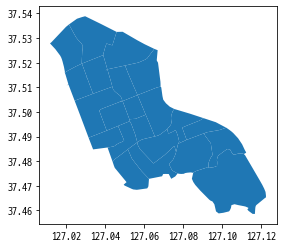

In [55]:
# _36 선택된 GeoDataFrame plot()으로 확인하기
selection_2.plot()

In [57]:
# _35 select_by_attribute 
# pandas의 and/or operator는 `&`, `\` 이다
selection_3 = _gdf[(_gdf['SGG_NM'] == '강남구') | (_gdf['SGG_NM'] == '서초구')]
# selection_3 = _gdf[(_gdf['SGG_NM'] == '서초구')]
selection_3.head()

,SGG_NM,DONG_NM,SGG_CODE,SEDAE,SEDAE_INGU,TOTAL_POP,MALE_POP,FEMALE_POP,65_OVER,geom
339,서초구,서초1동,11650,9035,2.35,21532,10420,11112,2611,"POLYGON ((127.02701 37.48051, 127.02551 37.480..."
340,서초구,서초2동,11650,7216,2.28,16766,7999,8767,1771,"POLYGON ((127.03162 37.48954, 127.03378 37.485..."
341,서초구,서초3동,11650,12541,2.40,30439,14965,15474,4050,"POLYGON ((127.01576 37.49432, 127.01402 37.493..."
342,서초구,서초4동,11650,10553,2.94,31285,15178,16107,3552,"POLYGON ((127.02764 37.49796, 127.02128 37.496..."
343,서초구,잠원동,11650,13837,2.51,34940,16572,18368,3520,"POLYGON ((127.01944 37.51599, 127.01986 37.515..."


<AxesSubplot:>

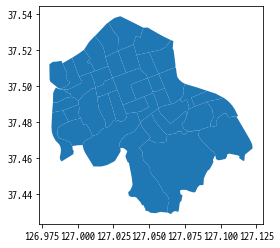

In [58]:
selection_3.plot()

In [59]:
# _37 선택된 파일 GeoJson으로 저장하기
selection_2.to_file('./output/gangnamgu.geojson', driver='GeoJSON')